# Add forbidden plane region

In [1]:
import molsysmt as msm

In [2]:
import openmm as mm
from openmm import unit
from openmm import app
from tqdm import tqdm
import numpy as np
from matplotlib import pyplot as plt

In [3]:
system = mm.System()
system.addParticle(39.948 * unit.amu) # masa del átomo de argón

0

In [4]:
msm.thirds.openmm.forces.add_forbidden_plane_region(system, point='[1.0, 0.0, 0.0] nm', normal_vector=[1,0,0],
                                                    width='1.5 nm', force_constant = '5000 kilojoules/(mol*angstroms**2)',
                                                    pbc=True)

0

In [5]:
# Formalismo NVT
temperature = 300*unit.kelvin

In [6]:
integration_timestep = 2.0*unit.femtoseconds
saving_timestep = 1.00*unit.picoseconds
simulation_time = 1000.*unit.picoseconds

saving_steps = int(saving_timestep/integration_timestep)
num_saving_steps = int(simulation_time/saving_timestep)

In [7]:
friction   = 5.0/unit.picoseconds
integrator = mm.LangevinIntegrator(temperature, friction, integration_timestep)

In [8]:
platform = mm.Platform.getPlatformByName('OpenCL')

In [9]:
times = np.zeros(num_saving_steps, np.float32) * unit.picoseconds
positions  = np.zeros([num_saving_steps,3], np.float32) * unit.nanometers
velocities = np.zeros([num_saving_steps,3], np.float32) * unit.nanometers/unit.picosecond
potential_energies   = np.zeros([num_saving_steps], np.float32) * unit.kilocalories_per_mole
kinetic_energies     = np.zeros([num_saving_steps], np.float32) * unit.kilocalories_per_mole

In [10]:
initial_positions  = [[2.0, 0.0, 0.0]] * unit.nanometers

In [11]:
context = mm.Context(system, integrator, platform)
context.setPositions(initial_positions)

In [12]:
L = 2.0
v1 = [L,0,0] * unit.nanometers
v2 = [0,L,0] * unit.nanometers
v3 = [0,0,L] * unit.nanometers
L = L * unit.nanometers
context.setPeriodicBoxVectors(v1, v2, v3)

In [13]:
state = context.getState(getEnergy=True, getPositions=True, getVelocities=True)

In [14]:
times[0] =  state.getTime()
positions[0] = state.getPositions()[0]
velocities[0] = state.getVelocities()[0]
kinetic_energies[0]=state.getKineticEnergy()
potential_energies[0]=state.getPotentialEnergy()

In [15]:
for ii in tqdm(range(1,num_saving_steps)):
    context.getIntegrator().step(saving_steps)
    state_xx = context.getState(getEnergy=True, getPositions=True, getVelocities=True)
    times[ii] = state_xx.getTime()
    positions[ii] = state_xx.getPositions()[0]
    velocities[ii] = state_xx.getVelocities()[0]
    kinetic_energies[ii]=state_xx.getKineticEnergy()
    potential_energies[ii]=state_xx.getPotentialEnergy()

  0%|                                                                                                                                                | 0/999 [00:00<?, ?it/s]

  0%|▌                                                                                                                                       | 4/999 [00:00<00:29, 34.10it/s]

  1%|█▎                                                                                                                                     | 10/999 [00:00<00:22, 44.89it/s]

  2%|██                                                                                                                                     | 15/999 [00:00<00:22, 44.69it/s]

  2%|██▋                                                                                                                                    | 20/999 [00:00<00:21, 45.73it/s]

  3%|███▍                                                                                                                                   | 25/999 [00:00<00:20, 46.87it/s]

  3%|████▏                                                                                                                                  | 31/999 [00:00<00:19, 50.24it/s]

  4%|█████                                                                                                                                  | 37/999 [00:00<00:19, 48.67it/s]

  4%|█████▊                                                                                                                                 | 43/999 [00:00<00:18, 50.81it/s]

  5%|██████▌                                                                                                                                | 49/999 [00:00<00:17, 52.89it/s]

  6%|███████▍                                                                                                                               | 55/999 [00:01<00:18, 50.83it/s]

  6%|████████▏                                                                                                                              | 61/999 [00:01<00:21, 43.98it/s]

  7%|████████▉                                                                                                                              | 66/999 [00:01<00:22, 40.65it/s]

  7%|█████████▌                                                                                                                             | 71/999 [00:01<00:23, 39.14it/s]

  8%|██████████▎                                                                                                                            | 76/999 [00:01<00:28, 32.83it/s]

  8%|██████████▊                                                                                                                            | 80/999 [00:01<00:27, 33.24it/s]

  8%|███████████▎                                                                                                                           | 84/999 [00:02<00:27, 33.60it/s]

  9%|███████████▉                                                                                                                           | 88/999 [00:02<00:27, 33.26it/s]

  9%|████████████▍                                                                                                                          | 92/999 [00:02<00:26, 34.48it/s]

 10%|████████████▉                                                                                                                          | 96/999 [00:02<00:26, 34.32it/s]

 10%|█████████████▍                                                                                                                        | 100/999 [00:02<00:25, 34.60it/s]

 10%|█████████████▉                                                                                                                        | 104/999 [00:02<00:25, 34.60it/s]

 11%|██████████████▍                                                                                                                       | 108/999 [00:02<00:25, 34.56it/s]

 11%|███████████████                                                                                                                       | 112/999 [00:02<00:26, 33.41it/s]

 12%|███████████████▌                                                                                                                      | 116/999 [00:02<00:25, 34.06it/s]

 12%|████████████████                                                                                                                      | 120/999 [00:03<00:25, 35.01it/s]

 12%|████████████████▋                                                                                                                     | 124/999 [00:03<00:25, 34.54it/s]

 13%|█████████████████▏                                                                                                                    | 128/999 [00:03<00:25, 34.78it/s]

 13%|█████████████████▋                                                                                                                    | 132/999 [00:03<00:24, 35.82it/s]

 14%|██████████████████▏                                                                                                                   | 136/999 [00:03<00:24, 35.52it/s]

 14%|██████████████████▊                                                                                                                   | 140/999 [00:03<00:24, 35.27it/s]

 14%|███████████████████▎                                                                                                                  | 144/999 [00:03<00:24, 34.99it/s]

 15%|███████████████████▊                                                                                                                  | 148/999 [00:03<00:24, 34.83it/s]

 15%|████████████████████▍                                                                                                                 | 152/999 [00:03<00:24, 34.81it/s]

 16%|████████████████████▉                                                                                                                 | 156/999 [00:04<00:24, 34.75it/s]

 16%|█████████████████████▍                                                                                                                | 160/999 [00:04<00:24, 34.69it/s]

 16%|█████████████████████▉                                                                                                                | 164/999 [00:04<00:24, 34.66it/s]

 17%|██████████████████████▌                                                                                                               | 168/999 [00:04<00:23, 34.77it/s]

 17%|███████████████████████                                                                                                               | 172/999 [00:04<00:30, 27.44it/s]

 18%|███████████████████████▌                                                                                                              | 176/999 [00:04<00:28, 28.99it/s]

 18%|████████████████████████▏                                                                                                             | 180/999 [00:04<00:27, 30.28it/s]

 18%|████████████████████████▋                                                                                                             | 184/999 [00:05<00:26, 31.28it/s]

 19%|█████████████████████████▏                                                                                                            | 188/999 [00:05<00:27, 29.00it/s]

 19%|█████████████████████████▊                                                                                                            | 192/999 [00:05<00:27, 28.92it/s]

 20%|██████████████████████████▏                                                                                                           | 195/999 [00:05<00:31, 25.55it/s]

 20%|███████████████████████████                                                                                                           | 202/999 [00:05<00:23, 34.53it/s]

 21%|███████████████████████████▉                                                                                                          | 208/999 [00:05<00:19, 40.50it/s]

 21%|████████████████████████████▌                                                                                                         | 213/999 [00:05<00:19, 40.95it/s]

 22%|█████████████████████████████▍                                                                                                        | 219/999 [00:05<00:17, 45.70it/s]

 23%|██████████████████████████████▏                                                                                                       | 225/999 [00:06<00:15, 49.11it/s]

 23%|██████████████████████████████▉                                                                                                       | 231/999 [00:06<00:14, 51.87it/s]

 24%|███████████████████████████████▊                                                                                                      | 237/999 [00:06<00:16, 47.30it/s]

 24%|████████████████████████████████▍                                                                                                     | 242/999 [00:06<00:17, 43.55it/s]

 25%|█████████████████████████████████▏                                                                                                    | 247/999 [00:06<00:17, 42.14it/s]

 25%|█████████████████████████████████▊                                                                                                    | 252/999 [00:06<00:18, 41.14it/s]

 26%|██████████████████████████████████▍                                                                                                   | 257/999 [00:06<00:18, 40.46it/s]

 26%|███████████████████████████████████▏                                                                                                  | 262/999 [00:07<00:22, 32.78it/s]

 27%|███████████████████████████████████▋                                                                                                  | 266/999 [00:07<00:23, 31.43it/s]

 27%|████████████████████████████████████▏                                                                                                 | 270/999 [00:07<00:22, 32.06it/s]

 27%|████████████████████████████████████▊                                                                                                 | 274/999 [00:07<00:22, 32.77it/s]

 28%|█████████████████████████████████████▎                                                                                                | 278/999 [00:07<00:24, 29.06it/s]

 28%|█████████████████████████████████████▊                                                                                                | 282/999 [00:07<00:23, 30.47it/s]

 29%|██████████████████████████████████████▎                                                                                               | 286/999 [00:07<00:22, 31.65it/s]

 29%|███████████████████████████████████████▏                                                                                              | 292/999 [00:07<00:18, 37.37it/s]

 30%|███████████████████████████████████████▉                                                                                              | 298/999 [00:08<00:17, 40.36it/s]

 30%|████████████████████████████████████████▋                                                                                             | 303/999 [00:08<00:18, 38.28it/s]

 31%|█████████████████████████████████████████▏                                                                                            | 307/999 [00:08<00:21, 32.36it/s]

 31%|█████████████████████████████████████████▋                                                                                            | 311/999 [00:08<00:24, 28.60it/s]

 32%|██████████████████████████████████████████▍                                                                                           | 316/999 [00:08<00:20, 33.11it/s]

 32%|██████████████████████████████████████████▉                                                                                           | 320/999 [00:08<00:19, 34.04it/s]

 32%|███████████████████████████████████████████▍                                                                                          | 324/999 [00:08<00:21, 31.23it/s]

 33%|███████████████████████████████████████████▉                                                                                          | 328/999 [00:09<00:25, 26.45it/s]

 33%|████████████████████████████████████████████▍                                                                                         | 331/999 [00:09<00:25, 26.61it/s]

 34%|████████████████████████████████████████████▉                                                                                         | 335/999 [00:09<00:23, 28.63it/s]

 34%|█████████████████████████████████████████████▍                                                                                        | 339/999 [00:09<00:21, 30.16it/s]

 34%|██████████████████████████████████████████████                                                                                        | 343/999 [00:09<00:20, 31.37it/s]

 35%|██████████████████████████████████████████████▌                                                                                       | 347/999 [00:09<00:20, 32.29it/s]

 35%|███████████████████████████████████████████████                                                                                       | 351/999 [00:09<00:19, 33.16it/s]

 36%|███████████████████████████████████████████████▌                                                                                      | 355/999 [00:09<00:18, 34.45it/s]

 36%|████████████████████████████████████████████████▏                                                                                     | 359/999 [00:10<00:18, 35.48it/s]

 37%|████████████████████████████████████████████████▉                                                                                     | 365/999 [00:10<00:15, 39.76it/s]

 37%|█████████████████████████████████████████████████▍                                                                                    | 369/999 [00:10<00:16, 38.13it/s]

 37%|██████████████████████████████████████████████████                                                                                    | 373/999 [00:10<00:18, 34.03it/s]

 38%|██████████████████████████████████████████████████▌                                                                                   | 377/999 [00:10<00:20, 30.30it/s]

 38%|███████████████████████████████████████████████████                                                                                   | 381/999 [00:10<00:19, 31.34it/s]

 39%|███████████████████████████████████████████████████▋                                                                                  | 385/999 [00:10<00:19, 32.09it/s]

 39%|████████████████████████████████████████████████████▏                                                                                 | 389/999 [00:10<00:18, 32.66it/s]

 39%|████████████████████████████████████████████████████▋                                                                                 | 393/999 [00:11<00:18, 33.20it/s]

 40%|█████████████████████████████████████████████████████▎                                                                                | 397/999 [00:11<00:17, 33.47it/s]

 40%|█████████████████████████████████████████████████████▊                                                                                | 401/999 [00:11<00:17, 33.81it/s]

 41%|██████████████████████████████████████████████████████▎                                                                               | 405/999 [00:11<00:17, 33.86it/s]

 41%|██████████████████████████████████████████████████████▊                                                                               | 409/999 [00:11<00:17, 33.99it/s]

 41%|███████████████████████████████████████████████████████▍                                                                              | 413/999 [00:11<00:17, 34.08it/s]

 42%|███████████████████████████████████████████████████████▉                                                                              | 417/999 [00:11<00:17, 34.11it/s]

 42%|████████████████████████████████████████████████████████▍                                                                             | 421/999 [00:11<00:16, 34.24it/s]

 43%|█████████████████████████████████████████████████████████                                                                             | 425/999 [00:11<00:16, 34.52it/s]

 43%|█████████████████████████████████████████████████████████▌                                                                            | 429/999 [00:12<00:18, 30.04it/s]

 43%|██████████████████████████████████████████████████████████                                                                            | 433/999 [00:12<00:18, 31.20it/s]

 44%|██████████████████████████████████████████████████████████▌                                                                           | 437/999 [00:12<00:19, 28.72it/s]

 44%|███████████████████████████████████████████████████████████▏                                                                          | 441/999 [00:12<00:18, 29.64it/s]

 45%|███████████████████████████████████████████████████████████▋                                                                          | 445/999 [00:12<00:17, 30.78it/s]

 45%|████████████████████████████████████████████████████████████▏                                                                         | 449/999 [00:12<00:17, 30.98it/s]

 45%|████████████████████████████████████████████████████████████▊                                                                         | 453/999 [00:12<00:18, 29.24it/s]

 46%|█████████████████████████████████████████████████████████████▏                                                                        | 456/999 [00:13<00:20, 26.78it/s]

 46%|█████████████████████████████████████████████████████████████▋                                                                        | 460/999 [00:13<00:18, 28.86it/s]

 46%|██████████████████████████████████████████████████████████████▏                                                                       | 464/999 [00:13<00:17, 29.93it/s]

 47%|██████████████████████████████████████████████████████████████▊                                                                       | 468/999 [00:13<00:16, 31.27it/s]

 47%|███████████████████████████████████████████████████████████████▎                                                                      | 472/999 [00:13<00:16, 32.16it/s]

 48%|███████████████████████████████████████████████████████████████▊                                                                      | 476/999 [00:13<00:15, 33.00it/s]

 48%|████████████████████████████████████████████████████████████████▍                                                                     | 480/999 [00:13<00:15, 33.18it/s]

 48%|████████████████████████████████████████████████████████████████▉                                                                     | 484/999 [00:13<00:15, 33.62it/s]

 49%|█████████████████████████████████████████████████████████████████▍                                                                    | 488/999 [00:14<00:15, 34.04it/s]

 49%|█████████████████████████████████████████████████████████████████▉                                                                    | 492/999 [00:14<00:14, 34.13it/s]

 50%|██████████████████████████████████████████████████████████████████▌                                                                   | 496/999 [00:14<00:14, 34.42it/s]

 50%|███████████████████████████████████████████████████████████████████                                                                   | 500/999 [00:14<00:14, 34.37it/s]

 50%|███████████████████████████████████████████████████████████████████▌                                                                  | 504/999 [00:14<00:14, 34.49it/s]

 51%|████████████████████████████████████████████████████████████████████▏                                                                 | 508/999 [00:14<00:14, 34.55it/s]

 51%|████████████████████████████████████████████████████████████████████▊                                                                 | 513/999 [00:14<00:12, 38.02it/s]

 52%|█████████████████████████████████████████████████████████████████████▎                                                                | 517/999 [00:14<00:13, 36.76it/s]

 52%|█████████████████████████████████████████████████████████████████████▉                                                                | 521/999 [00:14<00:13, 35.98it/s]

 53%|██████████████████████████████████████████████████████████████████████▍                                                               | 525/999 [00:15<00:13, 35.62it/s]

 53%|██████████████████████████████████████████████████████████████████████▉                                                               | 529/999 [00:15<00:13, 35.81it/s]

 53%|███████████████████████████████████████████████████████████████████████▍                                                              | 533/999 [00:15<00:13, 34.45it/s]

 54%|████████████████████████████████████████████████████████████████████████                                                              | 537/999 [00:15<00:13, 35.12it/s]

 54%|████████████████████████████████████████████████████████████████████████▌                                                             | 541/999 [00:15<00:12, 36.04it/s]

 55%|█████████████████████████████████████████████████████████████████████████                                                             | 545/999 [00:15<00:12, 35.19it/s]

 55%|█████████████████████████████████████████████████████████████████████████▋                                                            | 549/999 [00:15<00:12, 35.73it/s]

 55%|██████████████████████████████████████████████████████████████████████████▏                                                           | 553/999 [00:15<00:12, 35.95it/s]

 56%|██████████████████████████████████████████████████████████████████████████▋                                                           | 557/999 [00:15<00:12, 36.75it/s]

 56%|███████████████████████████████████████████████████████████████████████████▏                                                          | 561/999 [00:16<00:11, 37.29it/s]

 57%|███████████████████████████████████████████████████████████████████████████▊                                                          | 565/999 [00:16<00:11, 37.73it/s]

 57%|████████████████████████████████████████████████████████████████████████████▎                                                         | 569/999 [00:16<00:11, 38.04it/s]

 57%|████████████████████████████████████████████████████████████████████████████▊                                                         | 573/999 [00:16<00:11, 38.10it/s]

 58%|█████████████████████████████████████████████████████████████████████████████▍                                                        | 577/999 [00:16<00:14, 30.10it/s]

 58%|█████████████████████████████████████████████████████████████████████████████▉                                                        | 581/999 [00:16<00:13, 31.45it/s]

 59%|██████████████████████████████████████████████████████████████████████████████▍                                                       | 585/999 [00:16<00:12, 33.34it/s]

 59%|███████████████████████████████████████████████████████████████████████████████                                                       | 589/999 [00:16<00:11, 34.75it/s]

 59%|███████████████████████████████████████████████████████████████████████████████▋                                                      | 594/999 [00:17<00:10, 37.25it/s]

 60%|████████████████████████████████████████████████████████████████████████████████▍                                                     | 600/999 [00:17<00:09, 43.14it/s]

 61%|█████████████████████████████████████████████████████████████████████████████████▎                                                    | 606/999 [00:17<00:08, 47.31it/s]

 61%|█████████████████████████████████████████████████████████████████████████████████▉                                                    | 611/999 [00:17<00:09, 42.51it/s]

 62%|██████████████████████████████████████████████████████████████████████████████████▋                                                   | 616/999 [00:17<00:09, 39.82it/s]

 62%|███████████████████████████████████████████████████████████████████████████████████▎                                                  | 621/999 [00:17<00:09, 38.53it/s]

 63%|███████████████████████████████████████████████████████████████████████████████████▊                                                  | 625/999 [00:17<00:09, 37.98it/s]

 63%|████████████████████████████████████████████████████████████████████████████████████▌                                                 | 630/999 [00:17<00:09, 39.63it/s]

 64%|█████████████████████████████████████████████████████████████████████████████████████▎                                                | 636/999 [00:17<00:08, 44.88it/s]

 64%|█████████████████████████████████████████████████████████████████████████████████████▉                                                | 641/999 [00:18<00:08, 41.39it/s]

 65%|██████████████████████████████████████████████████████████████████████████████████████▋                                               | 646/999 [00:18<00:09, 39.18it/s]

 65%|███████████████████████████████████████████████████████████████████████████████████████▎                                              | 651/999 [00:18<00:09, 37.77it/s]

 66%|███████████████████████████████████████████████████████████████████████████████████████▊                                              | 655/999 [00:18<00:09, 36.73it/s]

 66%|████████████████████████████████████████████████████████████████████████████████████████▍                                             | 659/999 [00:18<00:10, 31.41it/s]

 66%|████████████████████████████████████████████████████████████████████████████████████████▉                                             | 663/999 [00:18<00:10, 32.10it/s]

 67%|█████████████████████████████████████████████████████████████████████████████████████████▌                                            | 668/999 [00:18<00:09, 34.93it/s]

 67%|██████████████████████████████████████████████████████████████████████████████████████████▍                                           | 674/999 [00:19<00:08, 40.39it/s]

 68%|███████████████████████████████████████████████████████████████████████████████████████████▏                                          | 680/999 [00:19<00:07, 45.33it/s]

 69%|████████████████████████████████████████████████████████████████████████████████████████████                                          | 686/999 [00:19<00:06, 48.92it/s]

 69%|████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 692/999 [00:19<00:07, 42.86it/s]

 70%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 697/999 [00:19<00:07, 40.38it/s]

 70%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 702/999 [00:19<00:07, 38.56it/s]

 71%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                       | 707/999 [00:19<00:07, 37.43it/s]

 71%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 711/999 [00:19<00:07, 36.65it/s]

 72%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 715/999 [00:20<00:07, 36.23it/s]

 72%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                     | 719/999 [00:20<00:07, 35.73it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████████                                     | 724/999 [00:20<00:06, 39.34it/s]

 73%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 730/999 [00:20<00:06, 43.07it/s]

 74%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 735/999 [00:20<00:05, 44.52it/s]

 74%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 740/999 [00:20<00:06, 40.68it/s]

 75%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 745/999 [00:20<00:06, 36.82it/s]

 75%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 749/999 [00:20<00:06, 37.22it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 753/999 [00:21<00:06, 37.55it/s]

 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 757/999 [00:21<00:06, 37.30it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                | 761/999 [00:21<00:06, 36.30it/s]

 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 765/999 [00:21<00:06, 35.53it/s]

 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 769/999 [00:21<00:06, 35.27it/s]

 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 773/999 [00:21<00:06, 35.64it/s]

 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 777/999 [00:21<00:06, 34.76it/s]

 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 781/999 [00:21<00:06, 34.58it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 785/999 [00:21<00:06, 34.69it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 789/999 [00:22<00:05, 35.50it/s]

 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 793/999 [00:22<00:06, 29.66it/s]

 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 798/999 [00:22<00:06, 33.14it/s]

 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 802/999 [00:22<00:05, 34.59it/s]

 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 806/999 [00:22<00:05, 35.49it/s]

 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 810/999 [00:22<00:05, 36.29it/s]

 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 814/999 [00:22<00:05, 36.82it/s]

 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 818/999 [00:22<00:05, 35.77it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 822/999 [00:23<00:04, 35.75it/s]

 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 826/999 [00:23<00:04, 36.04it/s]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 830/999 [00:23<00:04, 35.97it/s]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 834/999 [00:23<00:04, 36.20it/s]

 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 838/999 [00:23<00:04, 36.26it/s]

 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 842/999 [00:23<00:04, 35.81it/s]

 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 846/999 [00:23<00:04, 35.91it/s]

 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 850/999 [00:23<00:04, 36.00it/s]

 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 854/999 [00:23<00:04, 35.50it/s]

 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 858/999 [00:24<00:04, 34.95it/s]

 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 864/999 [00:24<00:03, 39.99it/s]

 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 870/999 [00:24<00:02, 43.33it/s]

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 875/999 [00:24<00:02, 42.01it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 880/999 [00:24<00:02, 41.05it/s]

 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 885/999 [00:24<00:02, 39.49it/s]

 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 889/999 [00:24<00:02, 38.52it/s]

 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 893/999 [00:24<00:02, 37.24it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 897/999 [00:25<00:02, 36.49it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 901/999 [00:25<00:02, 35.79it/s]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 905/999 [00:25<00:02, 35.44it/s]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 909/999 [00:25<00:02, 35.42it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 913/999 [00:25<00:02, 35.29it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 917/999 [00:25<00:02, 35.09it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 921/999 [00:25<00:02, 31.39it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 925/999 [00:25<00:02, 31.64it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 929/999 [00:25<00:02, 33.46it/s]

 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 933/999 [00:26<00:01, 34.72it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 937/999 [00:26<00:01, 35.78it/s]

 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 941/999 [00:26<00:01, 35.07it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 945/999 [00:26<00:01, 34.48it/s]

 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 949/999 [00:26<00:01, 35.61it/s]

 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 953/999 [00:26<00:01, 36.47it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 957/999 [00:26<00:01, 37.07it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 961/999 [00:26<00:01, 35.94it/s]

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 965/999 [00:26<00:00, 35.99it/s]

 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 970/999 [00:27<00:00, 37.19it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 976/999 [00:27<00:00, 42.89it/s]

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 981/999 [00:27<00:00, 38.66it/s]

 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 985/999 [00:27<00:00, 37.48it/s]

 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 989/999 [00:27<00:00, 36.57it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 993/999 [00:27<00:00, 35.76it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 997/999 [00:27<00:00, 35.28it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999/999 [00:27<00:00, 35.83it/s]

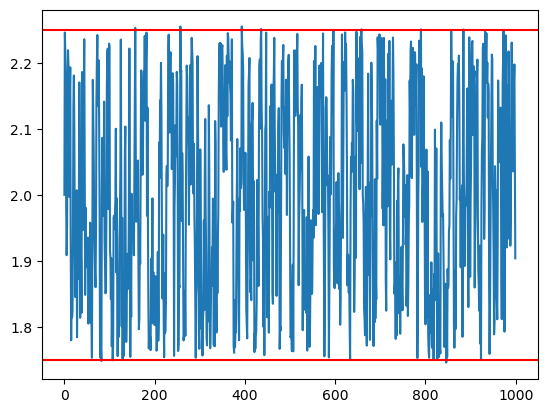

In [16]:
plt.plot(times, positions[:,0])
plt.axhline(y=2.25, color='red', linestyle='-')
plt.axhline(y=1.75, color='red', linestyle='-')
plt.show()

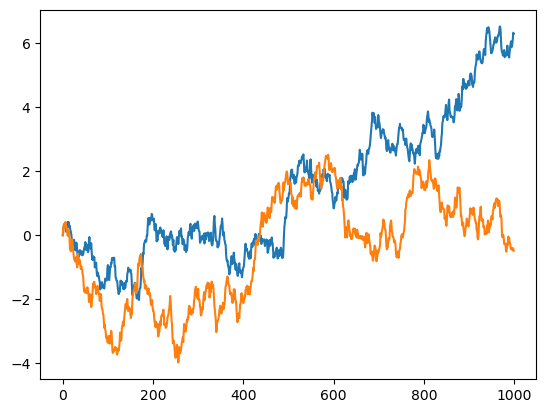

In [17]:
plt.plot(times, positions[:,1])
plt.plot(times, positions[:,2])
plt.show()